# Mathematical Finance Basics

### Simple Rate of Return

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as wb
import warnings
warnings.filterwarnings('ignore')

In [2]:
PG = wb.DataReader('PG',data_source='yahoo',start='1995-1-1')
PG['250mean'] = PG['Close'].rolling(250).mean()

In [3]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,250mean
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.362402,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.311406,NaN
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.222151,NaN
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.234900,NaN
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.209402,NaN


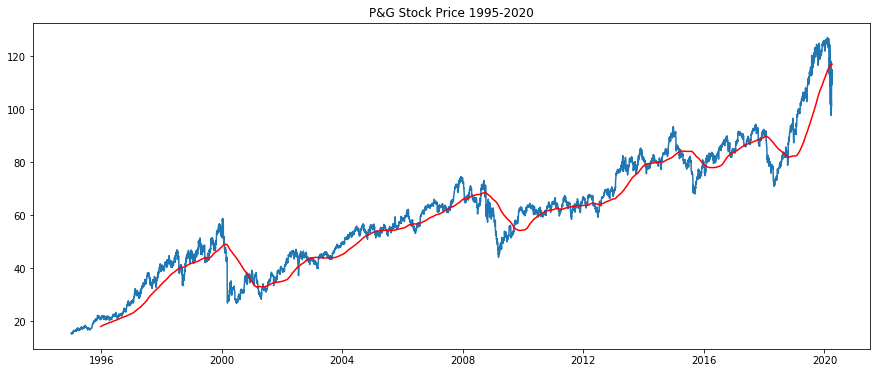

In [4]:
plt.figure(figsize=(15,6))
plt.title('P&G Stock Price 1995-2020')
plt.plot(PG['Close'])
plt.plot(PG['250mean'],c='red')

In [5]:
PG['Return'] = PG['Adj Close'] / PG['Adj Close'].shift(1) - 1
PG.tail()

,High,Low,Open,Close,Volume,Adj Close,250mean,Return
Date,,,,,,,,
2020-03-30,115.790001,110.199997,113.900002,115.000000,14571600.0,115.000000,116.92756,0.043841
2020-03-31,114.290001,108.949997,113.500000,110.000000,21691000.0,110.000000,116.95280,-0.043478
2020-04-01,112.180000,107.000000,107.949997,109.330002,11095800.0,109.330002,116.97640,-0.006091
2020-04-02,114.989998,107.500000,107.690002,114.400002,9167900.0,114.400002,117.01940,0.046373
2020-04-03,114.809998,113.010002,107.690002,114.690002,570705.0,114.690002,117.05828,0.002535


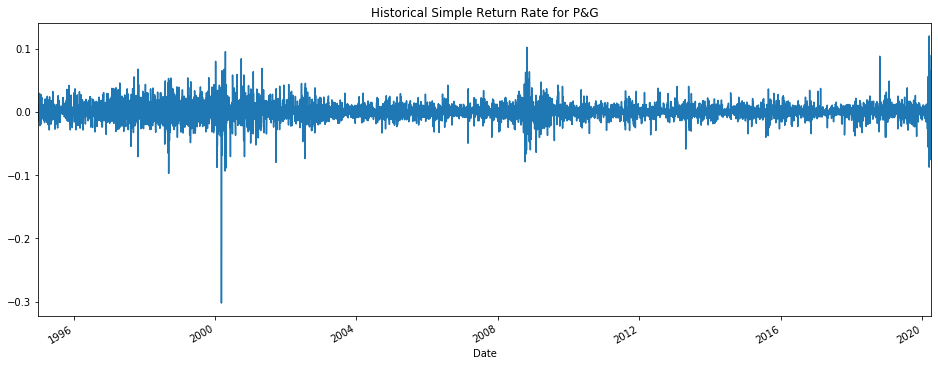

In [6]:
plt.title('Historical Simple Return Rate for P&G')
PG['Return'].plot(figsize=(16,6))

In [7]:
avg_return_d = PG['Return'].mean()
print('Daily Avg Return: ',round(avg_return_d,7)*100,'%')
avg_return_y = avg_return_d * 250
print('Yearly Avg Return: ',round(avg_return_y,7)*100,'%')

Daily Avg Return:  0.05585 %
Yearly Avg Return:  13.963220000000002 %


### Log Rate of Return

In [8]:
PG['LogReturn'] = np.log(PG['Adj Close']) - np.log(PG['Adj Close'].shift(1))
PG.tail()

,High,Low,Open,Close,Volume,Adj Close,250mean,Return,LogReturn
Date,,,,,,,,,
2020-03-30,115.790001,110.199997,113.900002,115.000000,14571600.0,115.000000,116.92756,0.043841,0.042908
2020-03-31,114.290001,108.949997,113.500000,110.000000,21691000.0,110.000000,116.95280,-0.043478,-0.044452
2020-04-01,112.180000,107.000000,107.949997,109.330002,11095800.0,109.330002,116.97640,-0.006091,-0.006110
2020-04-02,114.989998,107.500000,107.690002,114.400002,9167900.0,114.400002,117.01940,0.046373,0.045330
2020-04-03,114.809998,113.010002,107.690002,114.690002,570705.0,114.690002,117.05828,0.002535,0.002532


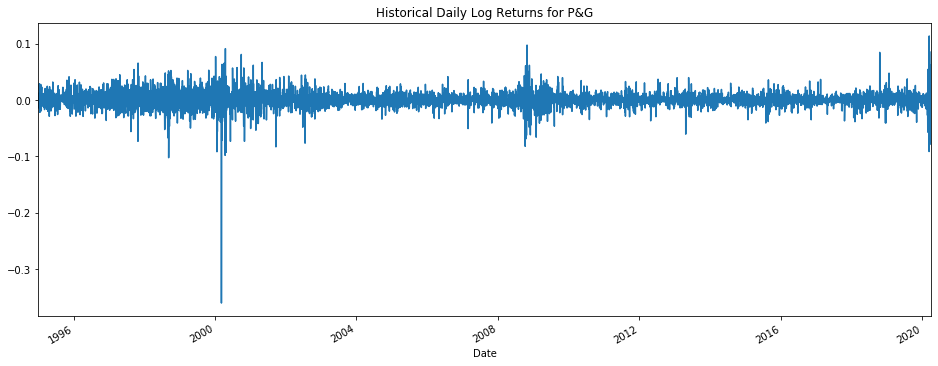

In [9]:
plt.title('Historical Daily Log Returns for P&G')
PG['LogReturn'].plot(figsize=(16,6))

In [10]:
avg_logreturn_d = PG['LogReturn'].mean()
print('Daily Avg Return: ',round(avg_logreturn_d,7)*100,'%')
avg_logreturn_y = avg_logreturn_d * 250
print('Yearly Avg Return: ',round(avg_logreturn_y,7)*100,'%')

Daily Avg Return:  0.04548 %
Yearly Avg Return:  11.37082 %


In [11]:
PG

,High,Low,Open,Close,Volume,Adj Close,250mean,Return,LogReturn
Date,,,,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,6.362402,NaN,NaN,NaN
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,6.311406,NaN,-0.008015,-0.008047
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,6.222151,NaN,-0.014142,-0.014243
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,6.234900,NaN,0.002049,0.002047
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,6.209402,NaN,-0.004090,-0.004098
...,...,...,...,...,...,...,...,...,...
2020-03-30,115.790001,110.199997,113.900002,115.000000,14571600.0,115.000000,116.92756,0.043841,0.042908
2020-03-31,114.290001,108.949997,113.500000,110.000000,21691000.0,110.000000,116.95280,-0.043478,-0.044452
2020-04-01,112.180000,107.000000,107.949997,109.330002,11095800.0,109.330002,116.97640,-0.006091,-0.006110


In [12]:
PG['Mov_Vol'] = PG['LogReturn'].rolling(250).std()*np.sqrt(250)

Text(0.5, 1.0, 'Return Skewness')

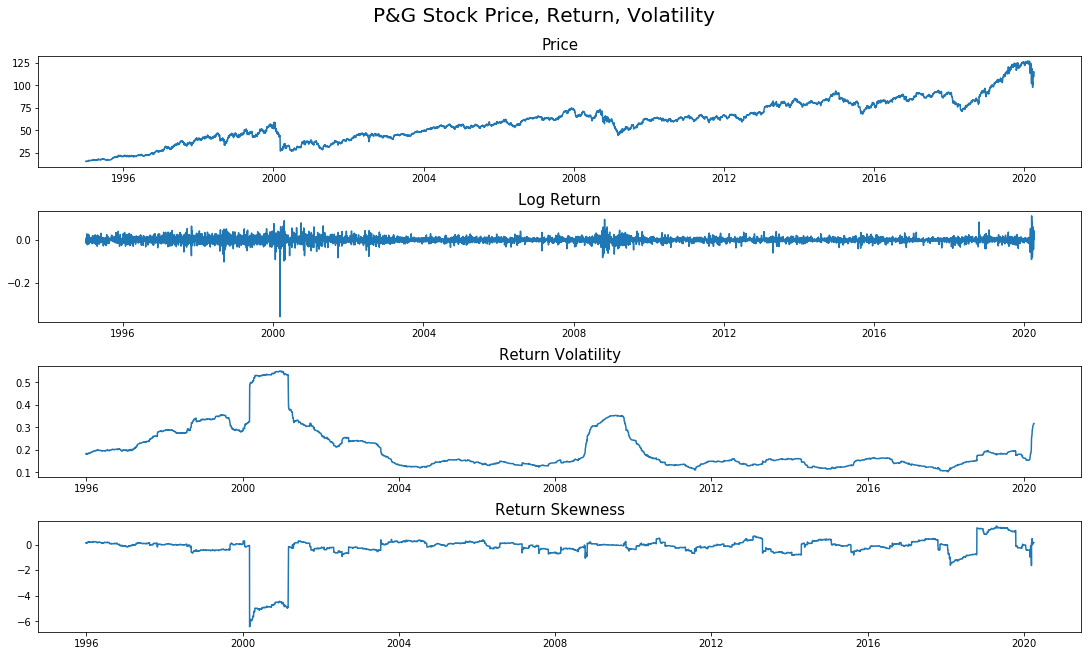

In [13]:
skew = PG['LogReturn'].rolling(250).skew()
fig,ax = plt.subplots(4,1,constrained_layout=True)
fig.figsize = (25,6)
data_list = ['Close','LogReturn','Mov_Vol']
titles = ['Price','Log Return','Return Volatility']
fig.set_figheight(9)
fig.set_figwidth(15)
fig.suptitle('P&G Stock Price, Return, Volatility',size=20)
for i in range(3):
    ax[i].plot(PG[data_list[i]])
    ax[i].set_title(titles[i],size=15)
ax[3].plot(skew)
ax[3].set_title('Return Skewness',size=15)

### Regression Analysis & Implied Volatility

#### Data Import

In [14]:
import urllib as url

In [15]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
url.request.urlretrieve(es_url, './data/es.txt')
url.request.urlretrieve(vs_url, './data/vs.txt')

('./data/vs.txt', <http.client.HTTPMessage at 0x2c557607ec8>)

In [16]:
# Remove blanks
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [17]:
# Taking a look at the headers
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [18]:
# There is also a sudden format change in the data
# A semicolon is added at the end of each linea
for line in lines[3884:3888]:
    print(line[41:])

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;



In [19]:
# We will create a new, corrected file
new_file = open('./data/es50.txt', 'w')
# opens a new file
new_file.writelines('date' + lines[3][:-1]
+ ';DEL' + lines[3][-1])
# writes the corrected third line of the original file
# as first line of new file
# DEL column is for the sudden semicolons
new_file.writelines(lines[4:])
# writes the remaining lines of the orignial file
new_file.close()

In [20]:
# New header:
with open('./data/es50.txt', 'r') as file:
    print(file.readlines()[:5])

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n', '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n', '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n', '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n', '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']


In [21]:
cols = ['SX5P','SX5E','SXXP','SXXE','SXXF','SXXA','DK5F','DKXF']
es = pd.read_csv('./data/es50.txt',index_col=0,header=None,
                parse_dates=True,sep=';',dayfirst=True,
                skiprows=4,names=cols)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [22]:
# VSTOXX is a volatility index
# implied by options on the EURO STOXX 50 index
vs = pd.read_csv('./data/vs.txt',index_col=0,header=2,
                parse_dates=True,sep=',',dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [23]:
# We create a new dataset for regression
# We will filter data from EUROSTOXX before 1999
# to match VSTOXX
import datetime as dt

In [24]:
data = pd.DataFrame()
data['EUROSTOXX'] = es[es.index > dt.datetime(1999,1,1)]['SX5E']
data['VSTOXX'] = vs[vs.index > dt.datetime(1999,1,1)]['V2TX']
data.head()

,EUROSTOXX,VSTOXX
1999-01-04,3543.10,18.2033
1999-01-05,3604.67,29.6912
1999-01-06,3685.36,25.1670
1999-01-07,3627.87,32.5205
1999-01-08,3616.57,33.2296


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4554 non-null float64
VSTOXX       4356 non-null float64
dtypes: float64(2)
memory usage: 106.7 KB


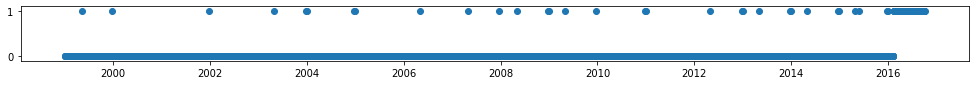

In [26]:
# We check the distributions of NaNs in time
plt.figure(figsize=(17,1))
plt.scatter(data.index,data.VSTOXX.isna())

In [27]:
# We have too many in 2016, we check the limit date
limit = data[~data.VSTOXX.isna()].index.max()
limit

Timestamp('2016-02-12 00:00:00')

In [28]:
data = data[data.index < limit]
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4386 entries, 1999-01-04 to 2016-02-11
Data columns (total 2 columns):
EUROSTOXX    4386 non-null float64
VSTOXX       4355 non-null float64
dtypes: float64(2)
memory usage: 102.8 KB


In [29]:
# The remaining NaNs we fill the NaN with forward fill (last known value)
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4386 entries, 1999-01-04 to 2016-02-11
Data columns (total 2 columns):
EUROSTOXX    4386 non-null float64
VSTOXX       4386 non-null float64
dtypes: float64(2)
memory usage: 102.8 KB


Text(0.5, 1.0, 'VSTOXX')

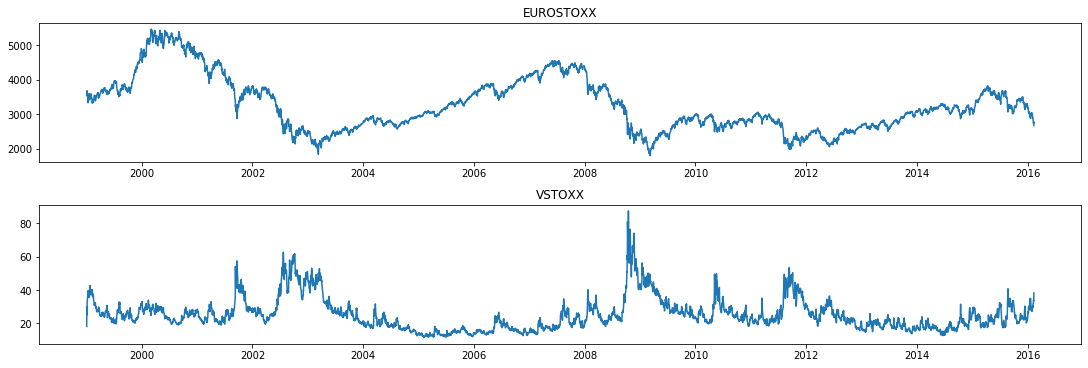

In [30]:
fig,ax = plt.subplots(2,1,constrained_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
ax[0].plot(data['EUROSTOXX'])
ax[0].set_title('EUROSTOXX')
ax[1].plot(data['VSTOXX'])
ax[1].set_title('VSTOXX')

In [31]:
# log returns
stoxx_ret = np.log(data / data.shift(1))
stoxx_ret.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C558D23D08>,
      dtype=object)

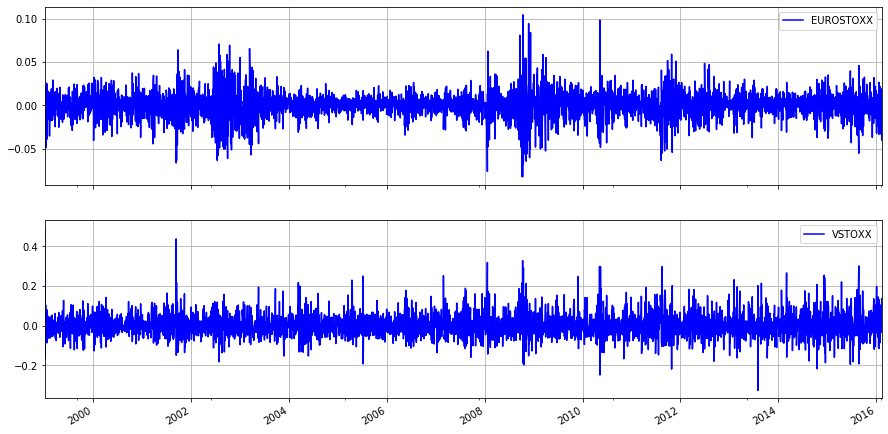

In [32]:
stoxx_ret.plot(subplots=True, grid=True, style='b', figsize=(15, 8))

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [34]:
n_size = stoxx_ret.shape[0]
X_stoxx = np.array(stoxx_ret['EUROSTOXX'][1:n_size+1]).reshape(n_size-1,1)
y_stoxx = np.array(stoxx_ret['VSTOXX'][1:n_size+1]).reshape(n_size-1,1)

In [35]:
model.fit(X_stoxx,y_stoxx)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
intercept_stoxx = float(model.intercept_)
beta_stoxx = float(model.coef_)
print('Intercept: ',intercept_stoxx)
print('Coefficients: ',beta_stoxx)
print('R^2: ',model.score(X_stoxx,y_stoxx))

Intercept:  -1.1469282088237488e-05
Coefficients:  -2.846298756986642
R^2:  0.5429890853667985


Text(0, 0.5, 'VSTOXX returns')

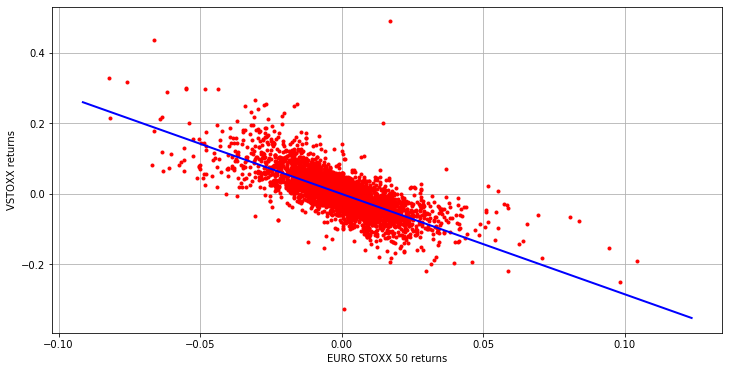

In [37]:
# Plotting regression
plt.figure(figsize=(12,6))
plt.plot(stoxx_ret['EUROSTOXX'],stoxx_ret['VSTOXX'],'r.')
ax = plt.axis() # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, intercept_stoxx + beta_stoxx * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

In [38]:
stoxx_ret.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.736878
VSTOXX,-0.736878,1.000000


Text(0.5, 1.0, 'Rolling correlation EUROSTOXX-VSTOXX')

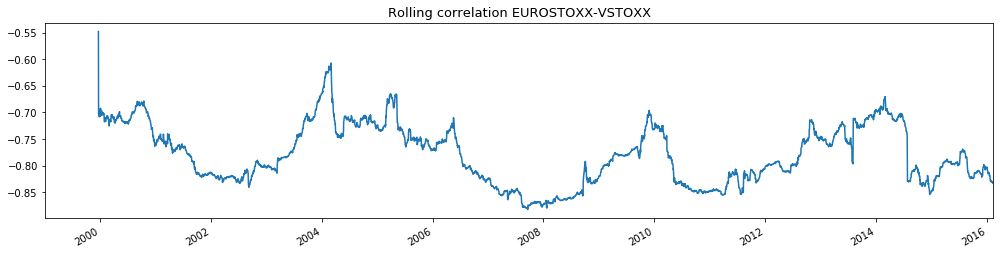

In [39]:
# Rolling correlation
roll_corr = stoxx_ret['EUROSTOXX'].rolling(250).corr(stoxx_ret['VSTOXX'])
roll_corr.plot(figsize=(17,4))
plt.title('Rolling correlation EUROSTOXX-VSTOXX',size=13)

### Portfolio Rate of Return

In [40]:
companies = ['PG','MSFT','F','GE']
portfolio = pd.DataFrame()
for company in companies:
    portfolio[company] = wb.DataReader(company,data_source='yahoo',start='1995-1-1')['Adj Close']

In [41]:
portfolio.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.362402,2.413537,3.256691,2.729230
1995-01-04,6.311406,2.431082,3.344314,2.729230
1995-01-05,6.222151,2.390982,3.315107,2.735919
1995-01-06,6.234900,2.431082,3.315107,2.722540
1995-01-09,6.209402,2.416045,3.373522,2.695783


In [42]:
portfolio.iloc[0]

PG      6.362402
MSFT    2.413537
F       3.256691
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

Text(0.5, 1.0, 'Normalized price for selected stocks')

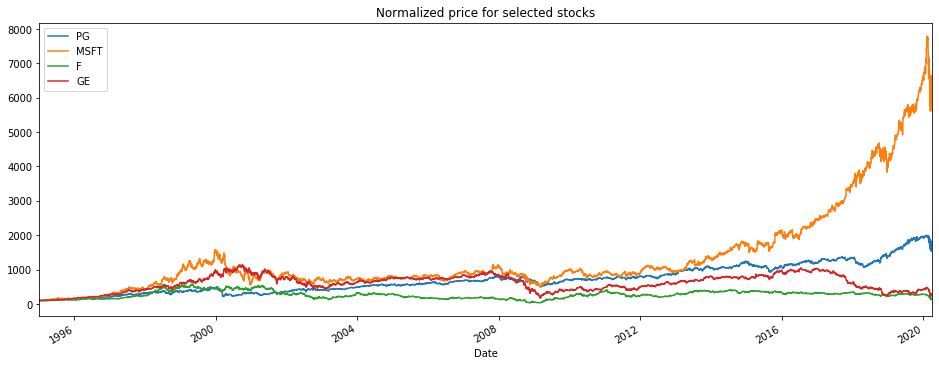

In [43]:
# Plot normalized data
((portfolio / portfolio.iloc[0])*100).plot(figsize=(16,6))
plt.title('Normalized price for selected stocks')

In [44]:
returns = (portfolio / portfolio.shift(1)) - 1
returns.tail()

,PG,MSFT,F,GE
Date,,,,
2020-03-30,0.043841,0.070341,-0.030828,0.035433
2020-03-31,-0.043478,-0.015727,-0.039761,0.006337
2020-04-01,-0.006091,-0.035508,-0.089027,-0.113350
2020-04-02,0.046373,0.020709,-0.009091,-0.019886
2020-04-03,0.000612,0.005833,0.003440,0.007971


In [45]:
weights1 = np.array([0.25 for i in range(4)])
np.dot(returns,weights1)

array([        nan,  0.00653998, -0.00922988, ..., -0.06099404,
        0.00952619,  0.00446416])

In [46]:
returns_y = returns.mean() * 250
returns_y

PG      0.139557
MSFT    0.213987
F       0.090439
GE      0.085627
dtype: float64

In [47]:
np.dot(returns_y,weights1)

0.13240242638914562

In [48]:
# Another portfolio
weights2 = np.array([0.4,0.4,0.15,0.05])
np.dot(returns_y,weights2)

0.1592646043558057

### Return of Indices

In [49]:
indices = ['^GSPC','^IXIC','^GDAXI']
index_df = pd.DataFrame()
for index in indices:
    index_df[index] = wb.DataReader(index,data_source='yahoo',start='1995-1-1')['Adj Close']

In [50]:
index_df.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1995-01-03,459.109985,743.580017,2068.919922
1995-01-04,460.709991,745.840027,2072.899902
1995-01-05,460.339996,745.659973,2051.459961
1995-01-06,460.679993,749.690002,2058.199951
1995-01-09,460.829987,752.090027,2053.409912


Text(0.5, 1.0, 'Normalized price for indices')

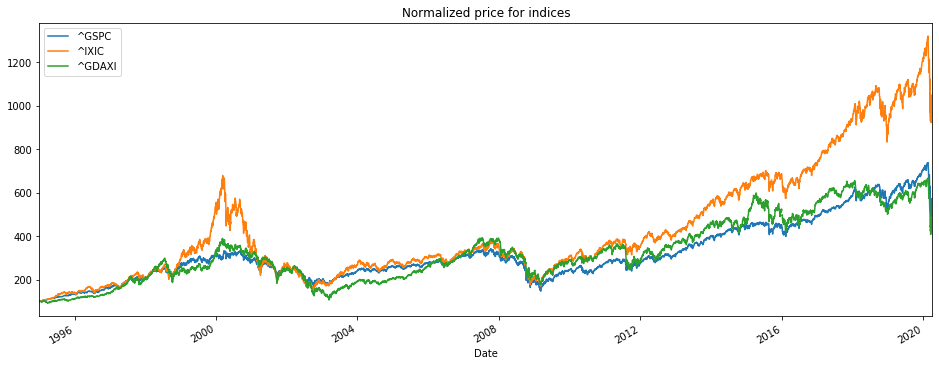

In [51]:
# Plot normalized data
((index_df / index_df.iloc[0])*100).plot(figsize=(16,6))
plt.title('Normalized price for indices')

In [52]:
index_returns = index_df / index_df.shift(1) - 1
index_returns.mean()*250

^GSPC     0.085244
^IXIC     0.120945
^GDAXI    0.074132
dtype: float64

In [53]:
stocks = ['PG','^GSPC','^DJI']
df_compare = pd.DataFrame()
for stock in stocks:
    df_compare[stock] = wb.DataReader(stock,data_source='yahoo',start='1995-1-1')['Adj Close']

In [54]:
df_compare.tail()

,PG,^GSPC,^DJI
Date,,,
2020-03-30,115.000000,2626.649902,22327.480469
2020-03-31,110.000000,2584.590088,21917.160156
2020-04-01,109.330002,2470.500000,20943.509766
2020-04-02,114.400002,2526.899902,21413.439453
2020-04-03,114.489998,2530.790039,21390.220703


Text(0.5, 1.0, 'Normalized prices: P&G vs indices')

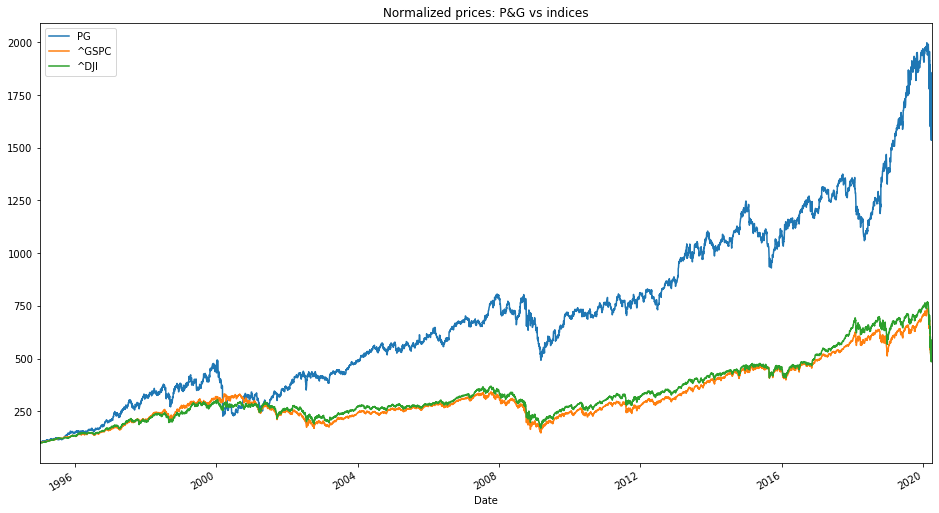

In [55]:
((df_compare / df_compare.iloc[0,:])*100).plot(figsize=(16,9))
plt.title('Normalized prices: P&G vs indices')

### Calculating Risk

In [56]:
companies = ['PG','BEI.DE']
sec_data = pd.DataFrame()
for company in companies:
    sec_data[company] = wb.DataReader(company,data_source='yahoo',start='1995-1-1')['Adj Close']

In [57]:
sec_data.tail()

,PG,BEI.DE
Date,,
2020-03-30,115.000000,93.620003
2020-03-31,110.000000,92.559998
2020-04-01,109.330002,88.639999
2020-04-02,114.400002,89.620003
2020-04-03,114.397903,89.559998


In [58]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns.tail()

,PG,BEI.DE
Date,,
2020-03-30,0.042908,0.022250
2020-03-31,-0.044452,-0.011387
2020-04-01,-0.006110,-0.043274
2020-04-02,0.045330,0.010995
2020-04-03,-0.000018,-0.000670


#### PG

In [59]:
np.mean(sec_returns['PG'])

0.00045443170480436666

In [60]:
np.mean(sec_returns['PG'])*250

0.11360792620109167

In [61]:
np.std(sec_returns['PG'])

0.01447154009949865

In [62]:
np.std(sec_returns['PG'])*250**0.5

0.22881513982437734

#### Beiersdorf

In [63]:
np.mean(sec_returns['BEI.DE'])

0.00035978423986782285

In [64]:
np.mean(sec_returns['BEI.DE'])*250

0.08994605996695572

In [65]:
np.std(sec_returns['BEI.DE'])

0.018370784157830614

In [66]:
np.std(sec_returns['BEI.DE'])*250**0.5

0.29046760171041464

#### Comparison 

In [67]:
np.mean(sec_returns[['PG','BEI.DE']])*250

PG        0.113608
BEI.DE    0.089946
dtype: float64

In [68]:
np.std(sec_returns[['PG','BEI.DE']])*250**0.5

PG        0.228815
BEI.DE    0.290468
dtype: float64

### Covariance Matrix

In [69]:
sec_returns['PG'].var()

0.00020945841692452178

In [70]:
sec_returns['PG'].var()*250

0.05236460423113044

In [71]:
sec_returns['BEI.DE'].var()

0.00033754921936369694

In [72]:
sec_returns['BEI.DE'].var()*250

0.08438730484092423

In [73]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000209,0.000028
BEI.DE,0.000028,0.000338


In [74]:
cov_matrix_y = sec_returns.cov()*250
cov_matrix_y

,PG,BEI.DE
PG,0.052365,0.007006
BEI.DE,0.007006,0.084387


In [75]:
corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.105708
BEI.DE,0.105708,1.000000


### Portfolio Risk

In [76]:
# Equally weighted portfolio
weights = np.array([.5,.5])

In [77]:
# Portfolio variance
pfolio_var = np.dot(weights.T,np.dot(sec_returns.cov()*250,weights))
pfolio_var

0.03769078928477898

In [78]:
# Portfolio volatility
pfolio_var**0.5

0.1941411581421595

In [79]:
PG_var_y = sec_returns['PG'].var()*250
BEI_var_y = sec_returns['BEI.DE'].var()*250
cov_risk = np.dot(weights.T**2,np.array([PG_var_y,BEI_var_y]))
cov_risk

0.03418797726801367

In [80]:
var_risk = pfolio_var - cov_risk
cov_risk

0.03418797726801367